In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#importing nba dataset
nba_df = pd.read_csv("nba_dataset.csv")

In [3]:
nba_df.head(8)

,Height,Weight,Foot_size,Gender
0,6.00,180,12,male
1,5.92,190,11,male
2,5.58,170,12,male
3,5.92,165,10,male
4,5.00,100,6,female
5,5.50,150,8,female
6,5.42,130,7,female
7,5.75,150,9,female


In [4]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height     8 non-null      float64
 1   Weight     8 non-null      int64  
 2   Foot_size  8 non-null      int64  
 3   Gender     8 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [5]:
nba_df.describe()

,Height,Weight,Foot_size
count,8.000000,8.000000,8.000000
mean,5.636250,154.375000,9.375000
std,0.333721,28.962722,2.263846
min,5.000000,100.000000,6.000000
25%,5.480000,145.000000,7.750000
50%,5.665000,157.500000,9.500000
75%,5.920000,172.500000,11.250000
max,6.000000,190.000000,12.000000


In [6]:
nba_df['Gender'].value_counts()

female    4
male      4
Name: Gender, dtype: int64

In [7]:
#gender mapping as numeric
gender = {"male": 0, "female": 1}
nba_df.Gender = [gender[item] for item in nba_df.Gender]

In [8]:
nba_df.head(8)

,Height,Weight,Foot_size,Gender
0,6.00,180,12,0
1,5.92,190,11,0
2,5.58,170,12,0
3,5.92,165,10,0
4,5.00,100,6,1
5,5.50,150,8,1
6,5.42,130,7,1
7,5.75,150,9,1


In [9]:
nba_df['Gender'].value_counts()

1    4
0    4
Name: Gender, dtype: int64

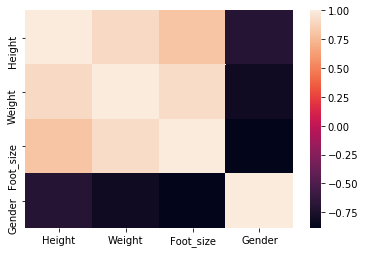

In [10]:
#Correlation between the columns
sns.heatmap(nba_df.corr())

In [11]:
#Differentiating result from the columns
X = nba_df.drop(['Gender'], axis=1)
y = nba_df.Gender

In [12]:
#importing train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=41, stratify=y)

In [13]:
#importing Naive Bayes, Confusion Matrix, Accruracy score libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [14]:
#fitting the model
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
#predicting the results
y_pred = model.predict(X_test)

In [16]:
#getting result for confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[1 0]
 [0 1]]


In [17]:
#getting accuracy score
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0